# **CH.SC.U4CSE23239 - SVM - Exercise 1**

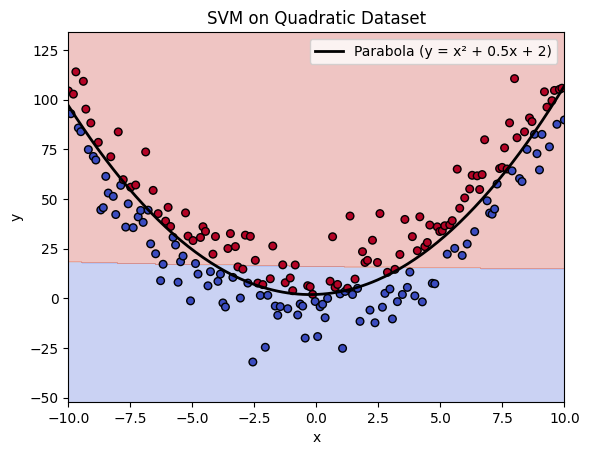

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = np.linspace(-10, 10, 200)

a, b, c = 1, 0.5, 2
parabola_y = a * x**2 + b * x + c

noise = np.random.normal(0, 15, 200)
y_points = parabola_y + noise

labels = (y_points > parabola_y).astype(int)

X = np.column_stack((x, y_points))
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = SVC(kernel="rbf", C=1.0, gamma="scale")
clf.fit(X_train, y_train)

xx, yy = np.meshgrid(np.linspace(-10, 10, 500),
                     np.linspace(min(y_points)-20, max(y_points)+20, 500))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)

plt.plot(x, parabola_y, color="black", linewidth=2, label="Parabola (y = x² + 0.5x + 2)")

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors="k")

plt.title("SVM on Quadratic Dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()
